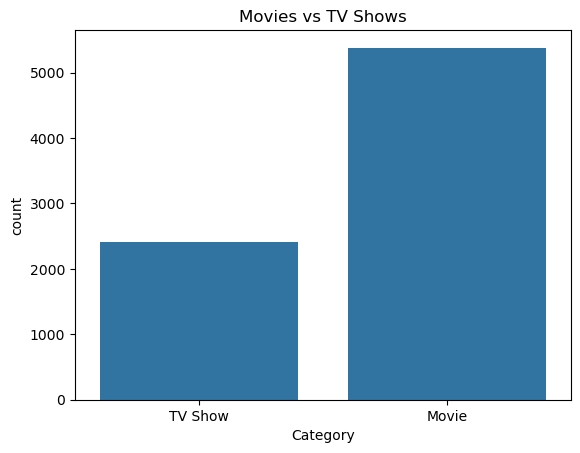

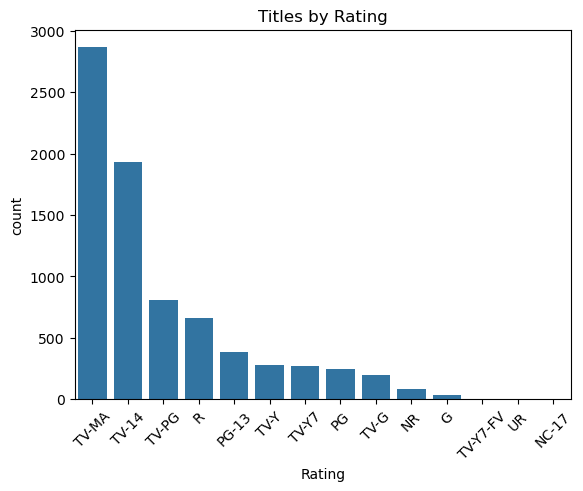

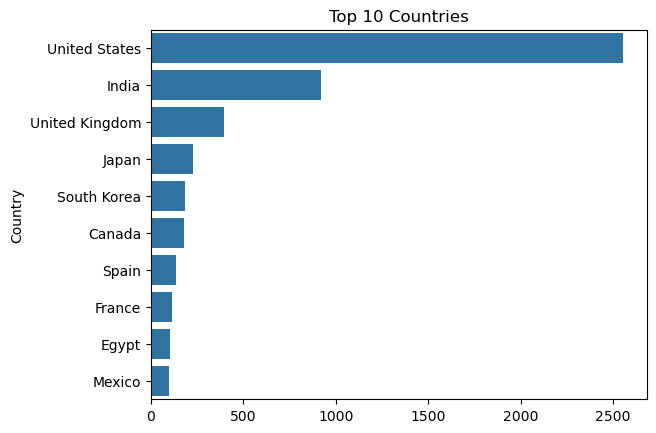

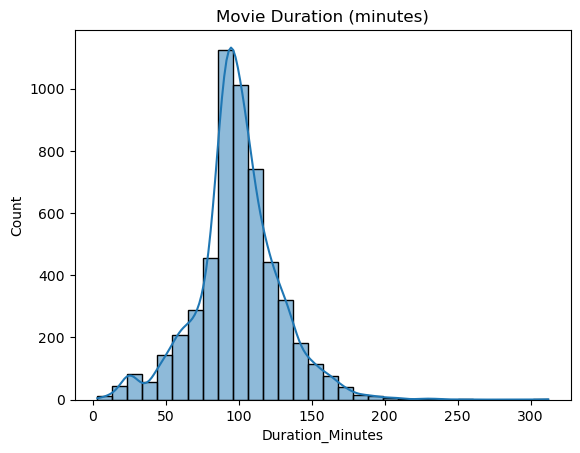

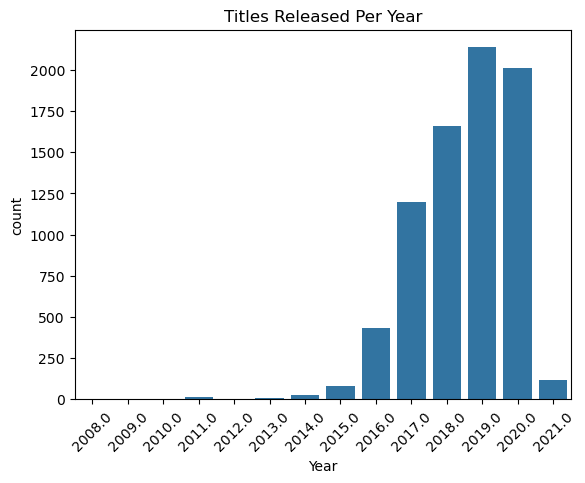

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('netflix.csv')

# Convert Release_Date to datetime and extract year
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

# Extract duration in minutes (for movies)
df['Duration_Minutes'] = df['Duration'].str.extract(r'(\d+)').astype(float)

# Plot 1: Count of Movies vs TV Shows
sns.countplot(x='Category', data=df)
plt.title('Movies vs TV Shows')
plt.show()

# Plot 2: Count of Titles by Rating
sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index)
plt.title('Titles by Rating')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Top 10 Countries by Number of Titles
top_countries = df['Country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Countries')
plt.show()

# Plot 4: Movie Duration Distribution
sns.histplot(df[df['Category']=='Movie']['Duration_Minutes'].dropna(), bins=30, kde=True)
plt.title('Movie Duration (minutes)')
plt.show()

# Plot 5: Titles Released Per Year
sns.countplot(x='Year', data=df, order=sorted(df['Year'].dropna().unique()))
plt.title('Titles Released Per Year')
plt.xticks(rotation=45)
plt.show()
